In [1]:
%%time
import pandas as pd
from utils import get_data, get_temperature_data

df , df_raw = get_data('./data')
df_temp = get_temperature_data("./data/temperature_brescia.json")
df = df_temp.merge(df, how='outer', left_index=True, right_index=True)

Wall time: 34.4 s


C:\Users\matte\Documents\TAG\ProjectWork\utils.py:112: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_temp = df_temp.set_index("datetime")[["Temperatura"]].loc["2014":].resample('H').last()


###############################################################################################################################

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 7)  # Change the default figure size

import seaborn as sns
sns.set()

In [3]:
df

,temp_min,temp_max,temp_media,radiazione(W/m2) (consuntivo_radiazione),total_load_value (domanda_elettrica),ET_rete (potenza_termica_oraria),temperatura (previsioni_temperatura),radiazione(W/m2) (previsioni_radiazione),precipitazioni(mm) (consuntivi_meteo),pressione(bar) (consuntivi_meteo),umidita(%) (consuntivi_meteo)
2014-01-01 00:00:00,1.0,7.0,4.0,NaN,NaN,80.816667,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,1.0,7.0,4.0,NaN,NaN,81.700000,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,1.0,7.0,4.0,NaN,NaN,79.933333,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,1.0,7.0,4.0,NaN,NaN,79.250000,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,1.0,7.0,4.0,NaN,NaN,83.583333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.513062,NaN,NaN,NaN
2021-12-05 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.662554,NaN,NaN,NaN
2021-12-05 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.681577,NaN,NaN,NaN
2021-12-05 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.652505,NaN,NaN,NaN


In [4]:
df_test = df[["ET_rete (potenza_termica_oraria)"]]

In [5]:
df_test["day"] = df_test.index.day

<ipython-input-5-0a1bc7c01b60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["day"] = df_test.index.day


In [6]:
df_test["hour"] = df_test.index.hour

<ipython-input-6-197caa12dd9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["hour"] = df_test.index.hour


In [7]:
df_test["dayweek"] = df_test.index.dayofweek

<ipython-input-7-d94bfbc24ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["dayweek"] = df_test.index.dayofweek


In [8]:
df_test.index.dayofweek

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', length=69504)

In [9]:
df_test.index.day_name()

Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', length=69504)

<AxesSubplot:xlabel='day'>

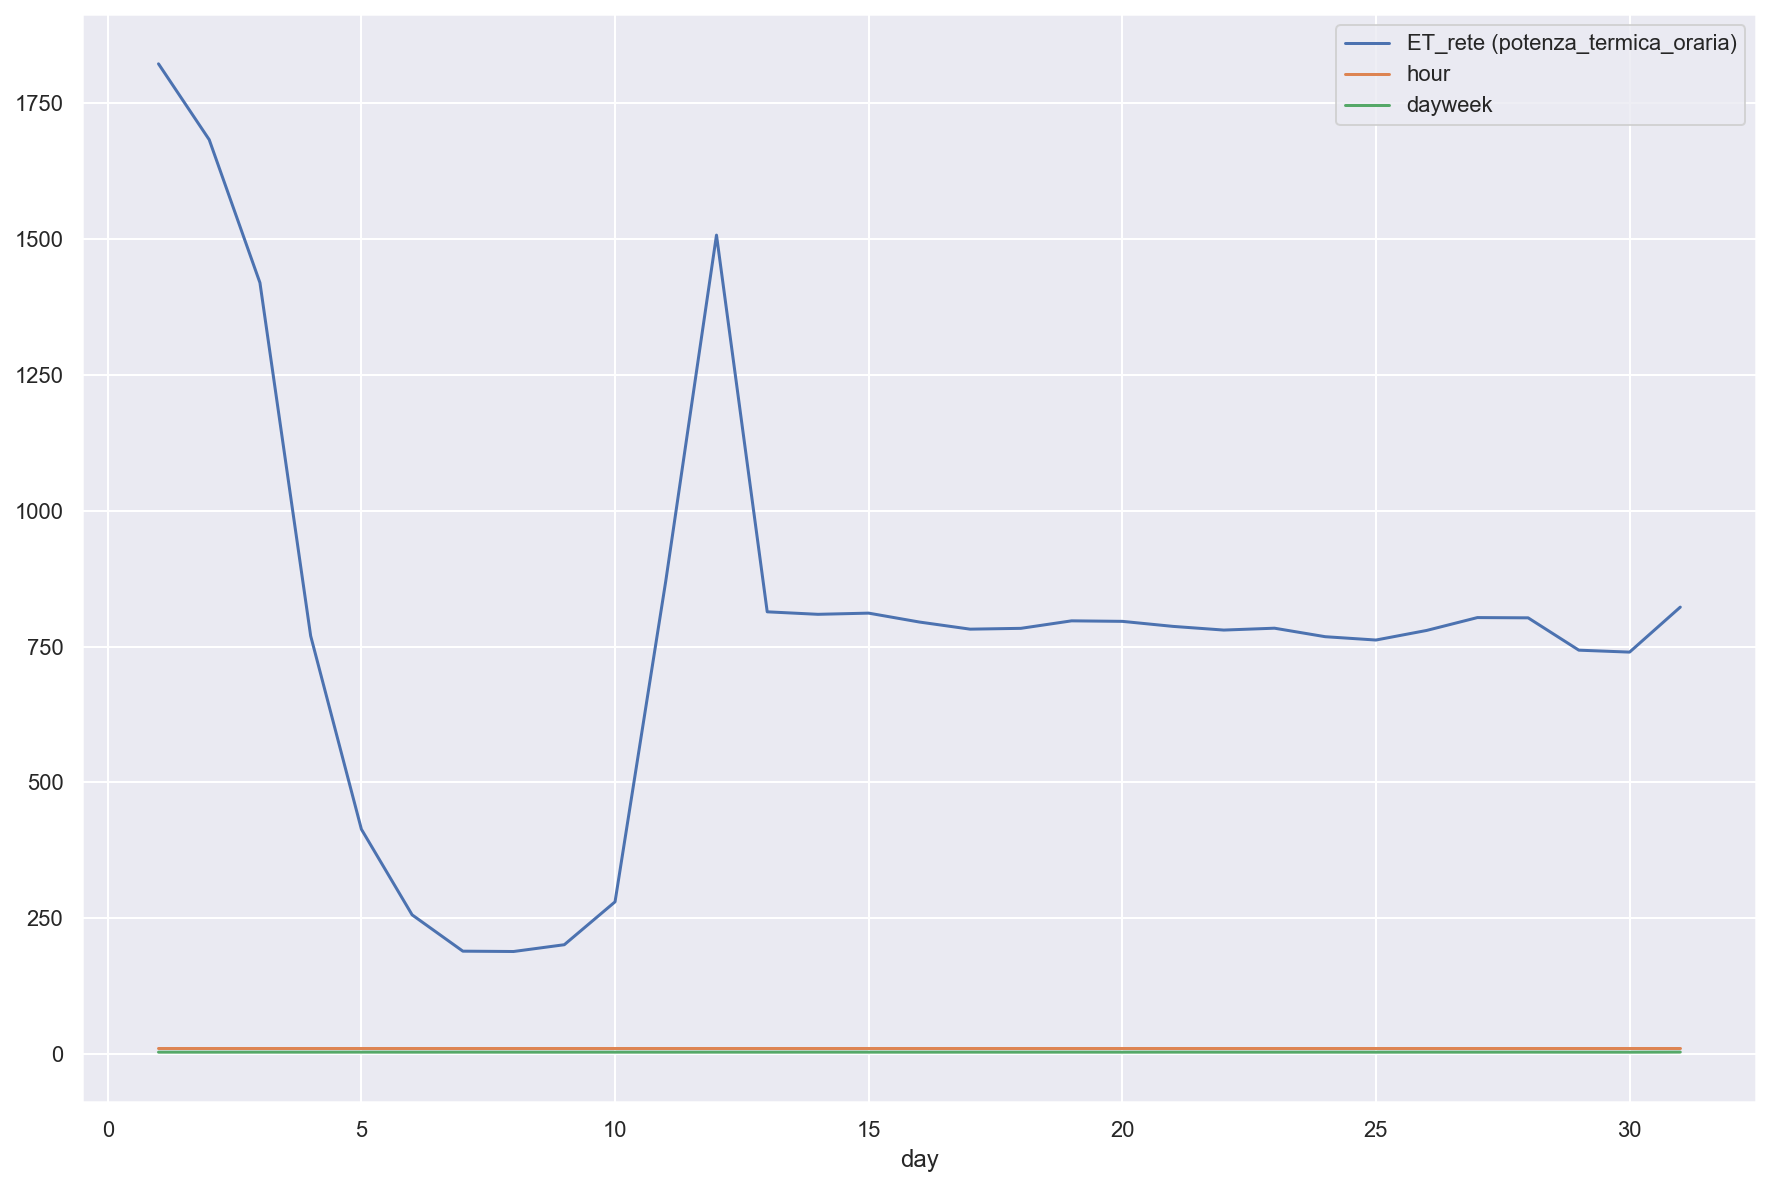

In [10]:
df_test.groupby("day").mean().plot()

<AxesSubplot:xlabel='hour'>

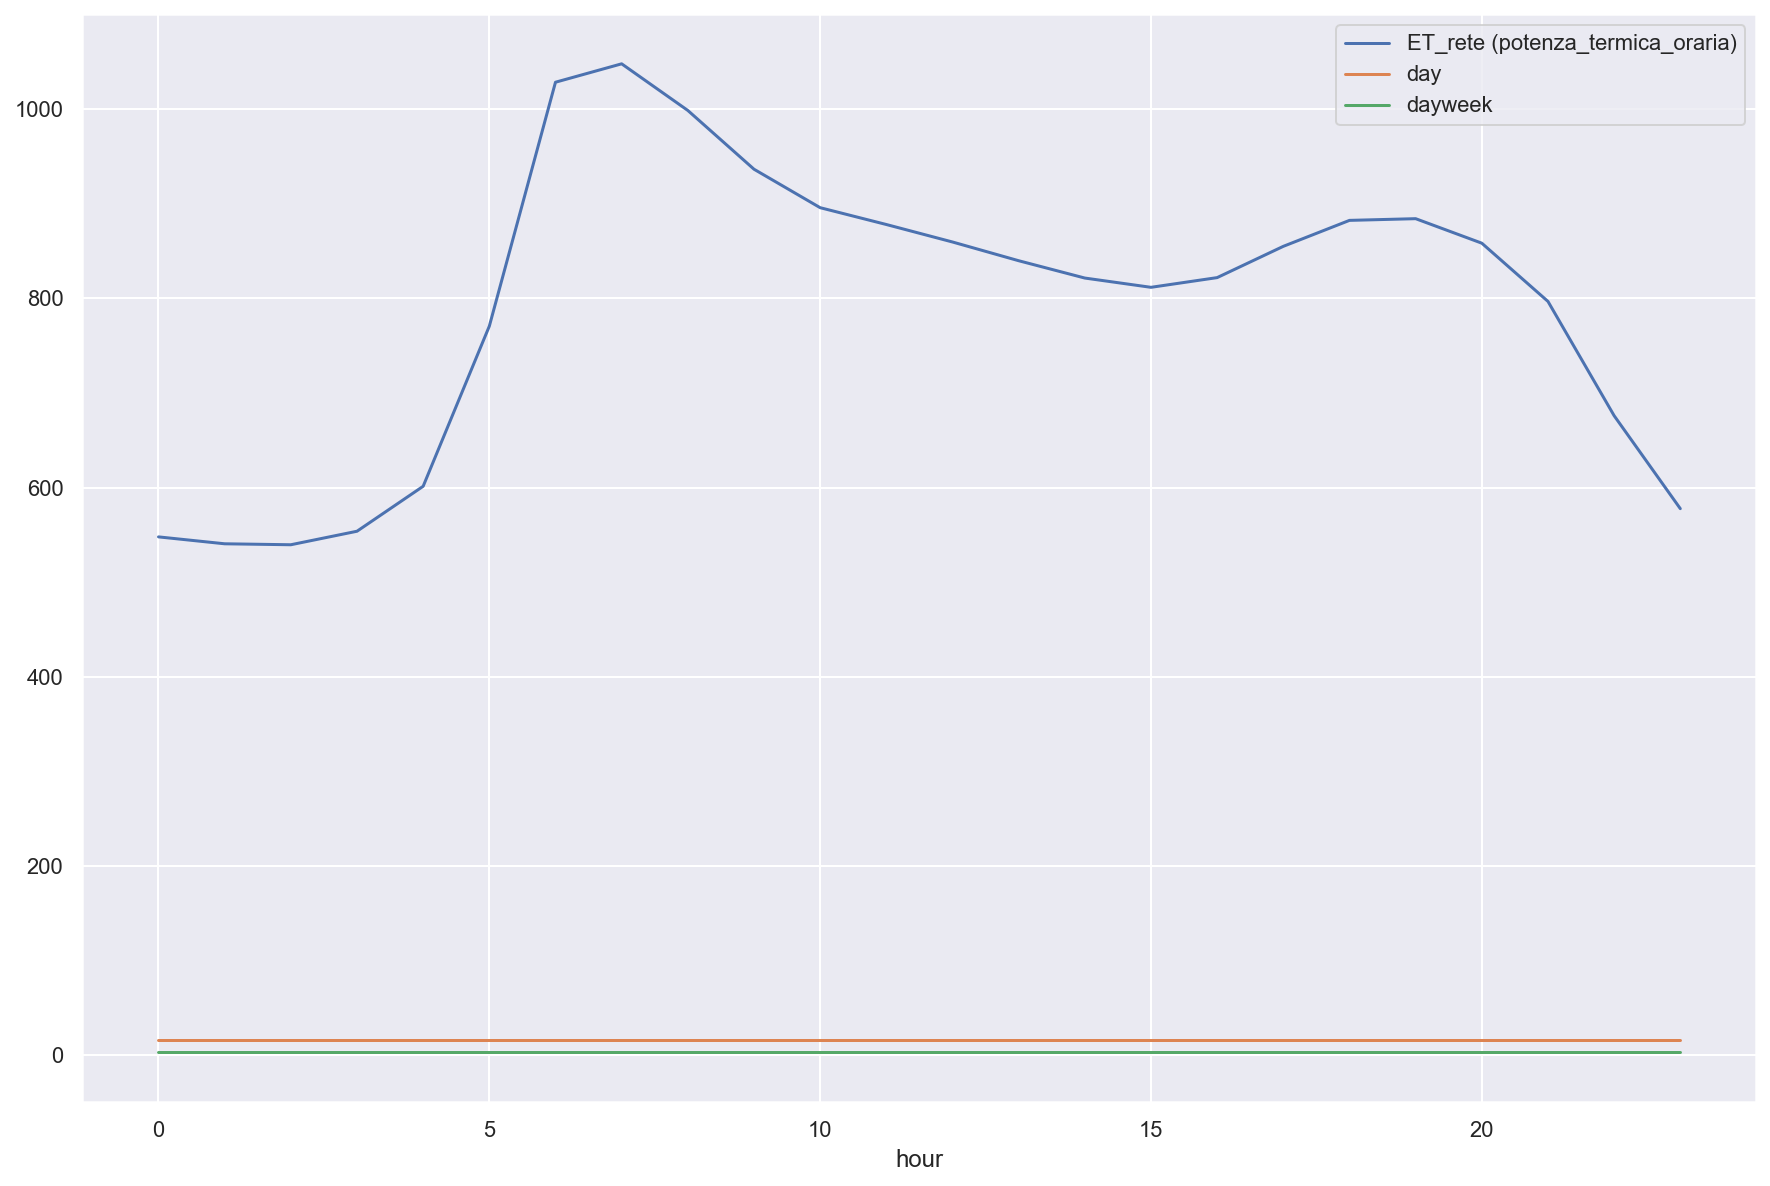

In [11]:
df_test.groupby("hour").mean().plot()

<AxesSubplot:xlabel='dayweek'>

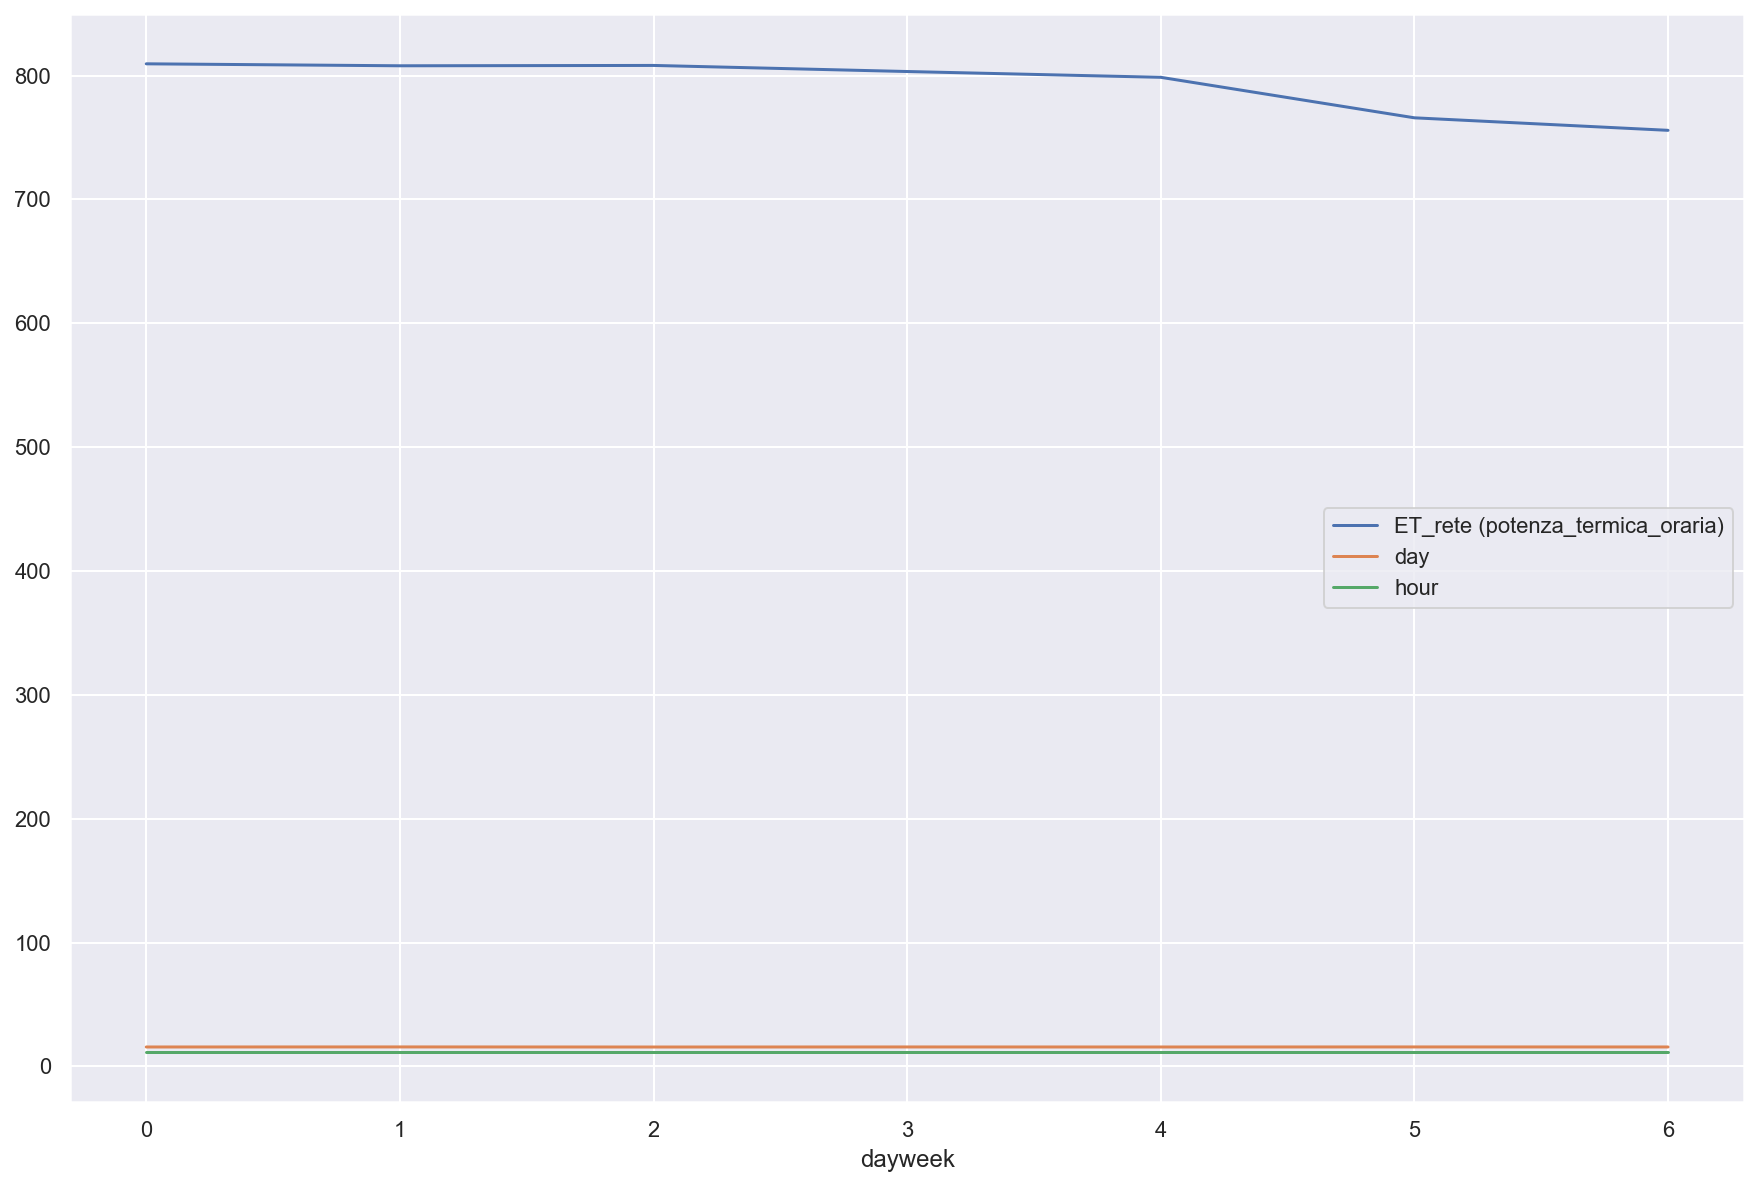

In [12]:
df_test.groupby("dayweek").mean().plot()

In [13]:
df[["ET_rete (potenza_termica_oraria)"]].isna().sum()

ET_rete (potenza_termica_oraria)    8736
dtype: int64

<ipython-input-14-fa84da6f69d9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df[["ET_rete (potenza_termica_oraria)"]].interpolate()["2020"].plot()


<AxesSubplot:>

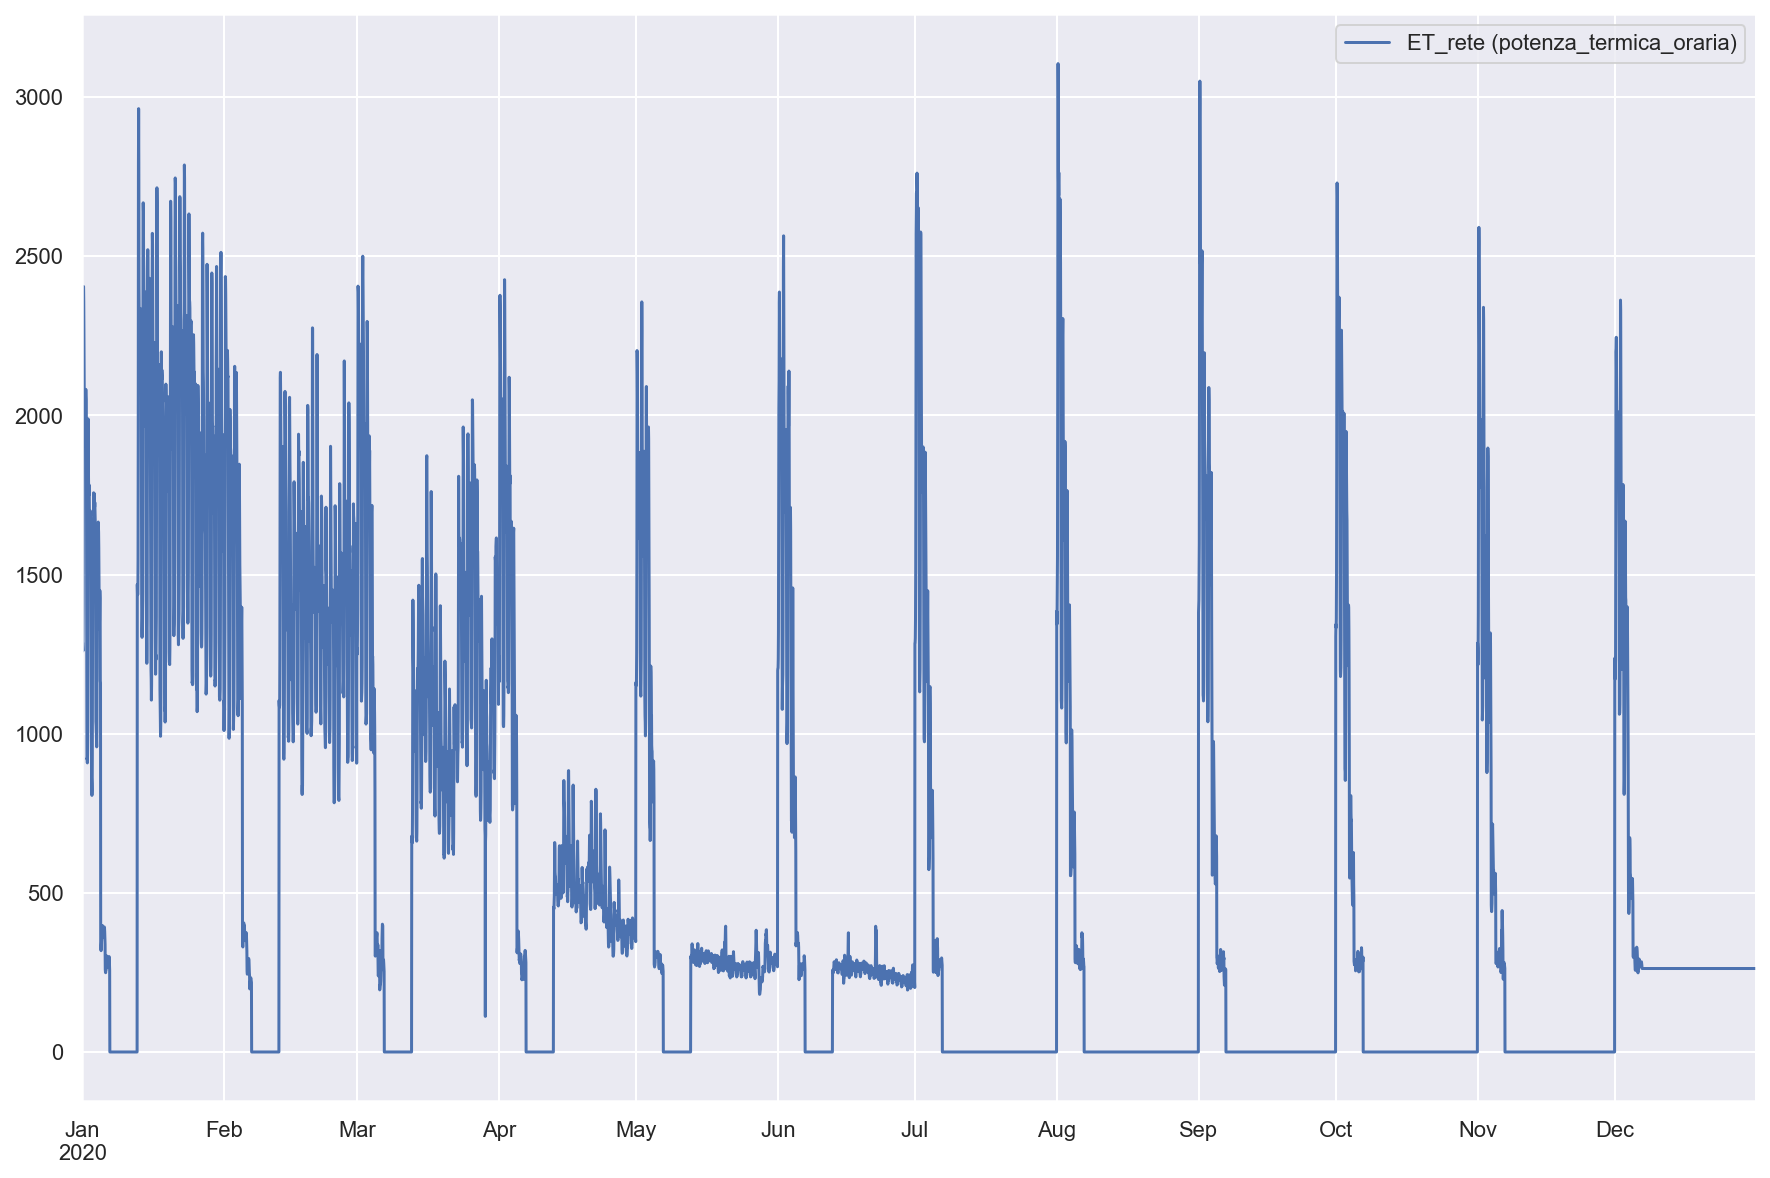

In [14]:
df[["ET_rete (potenza_termica_oraria)"]].interpolate()["2020"].plot()

In [15]:
df_raw.keys()

dict_keys(['Consuntivo_radiazione', 'DomandaElettrica', 'PotenzaTermicaOraria', 'PrevisioniTemperatura', 'Previsioni_radiazione', 'consuntivi_meteo'])

In [16]:
df_raw["PotenzaTermicaOraria"]

,ET Rete
Orario,
2014-01-01 00:00:00,78.7
2014-01-01 00:10:00,79.8
2014-01-01 00:20:00,81.4
2014-01-01 00:30:00,80.8
2014-01-01 00:40:00,82.5
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [17]:
df_raw["Consuntivo_radiazione"]

,Radiazione (W/m2)
Date-Time,
2014-06-19 10:10:00,926.630005
2014-06-19 10:20:00,944.340027
2014-06-19 10:30:00,947.510010
2014-06-19 10:40:00,936.599976
2014-06-19 10:50:00,937.059998
...,...
2021-05-26 06:40:00,473.831451
2021-05-26 06:50:00,507.065399
2021-05-26 07:00:00,511.532234


In [18]:
df_raw["Previsioni_radiazione"]

,RADIAZIONE (W/m2)
ORARIO,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0
...,...
2021-05-31 19:00:00,0.0
2021-05-31 20:00:00,0.0
2021-05-31 21:00:00,0.0


In [19]:
df_raw["DomandaElettrica"]

,YEAR,MONTH,DAY,AREANAME,TOTALLOADVALUE
DATETIME,,,,,
2015-01-01 23:00:00,2015,1,1,Italy,21568
2015-01-01 22:00:00,2015,1,1,Italy,24116
2015-01-01 21:00:00,2015,1,1,Italy,26859
2015-01-01 20:00:00,2015,1,1,Italy,29168
2015-01-01 19:00:00,2015,1,1,Italy,30611
...,...,...,...,...,...
2020-06-30 04:00:00,2020,6,30,Italy,30015
2020-06-30 03:00:00,2020,6,30,Italy,26815
2020-06-30 02:00:00,2020,6,30,Italy,26438


<AxesSubplot:>

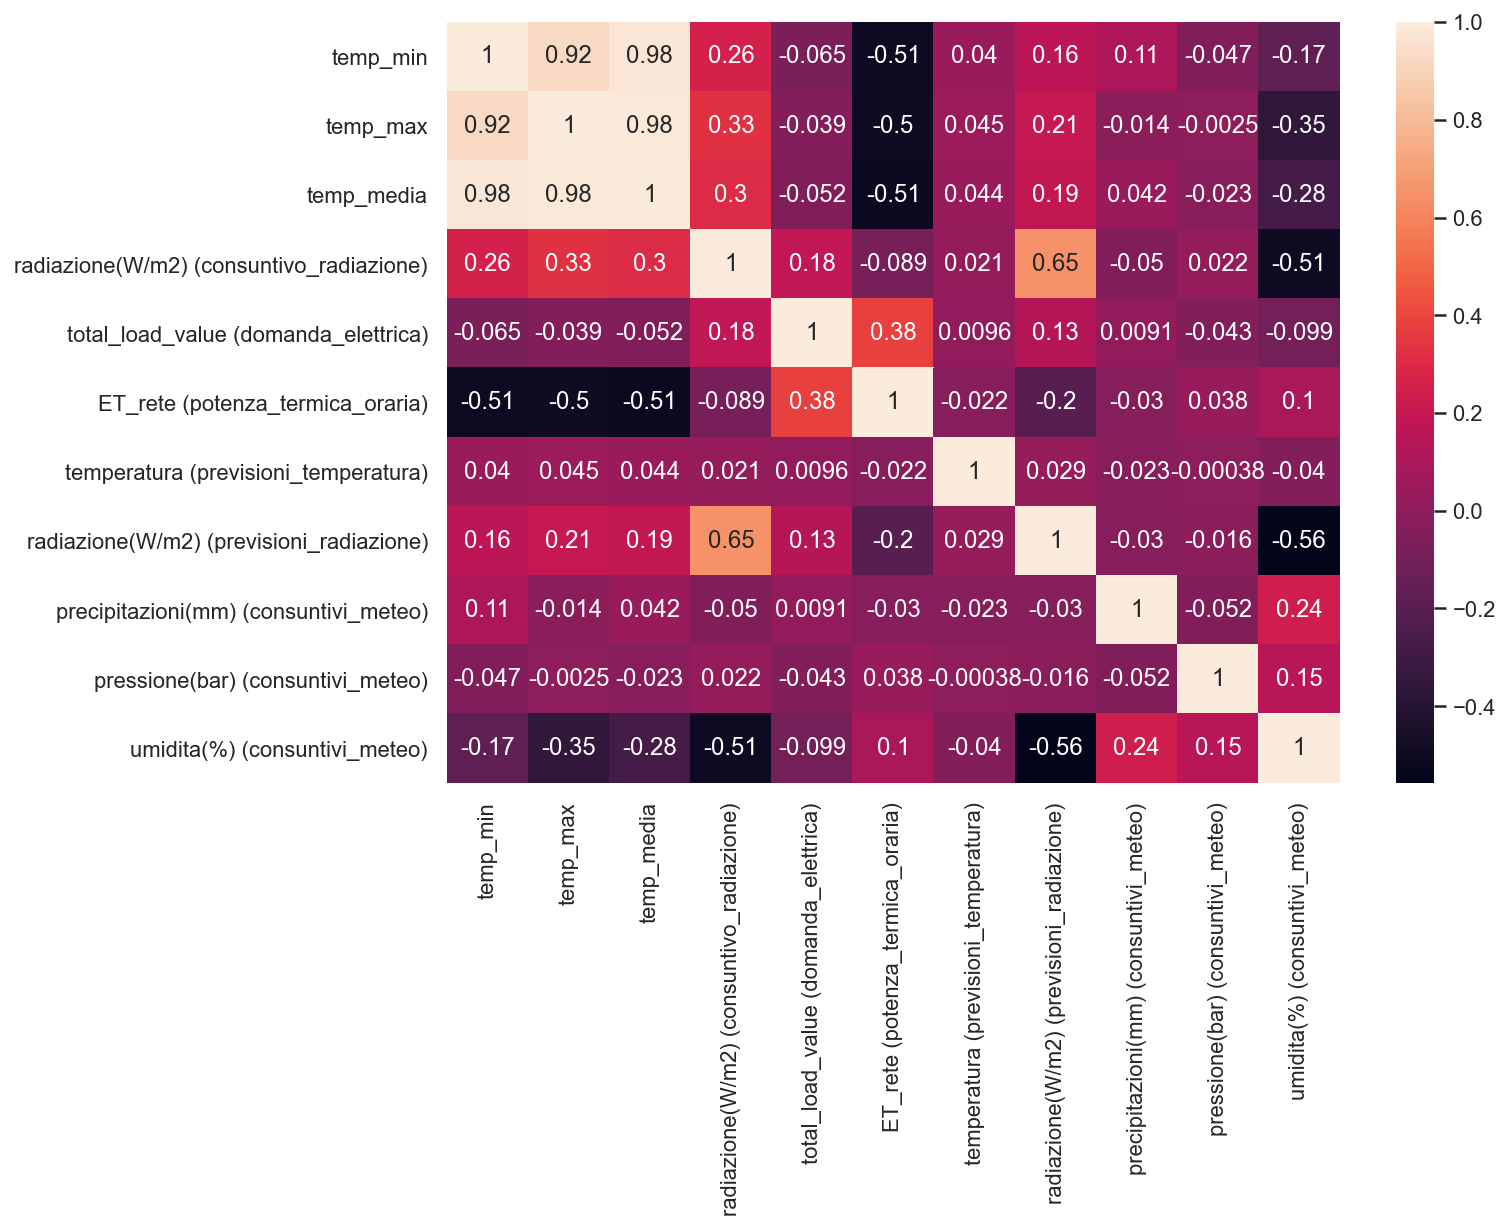

In [27]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

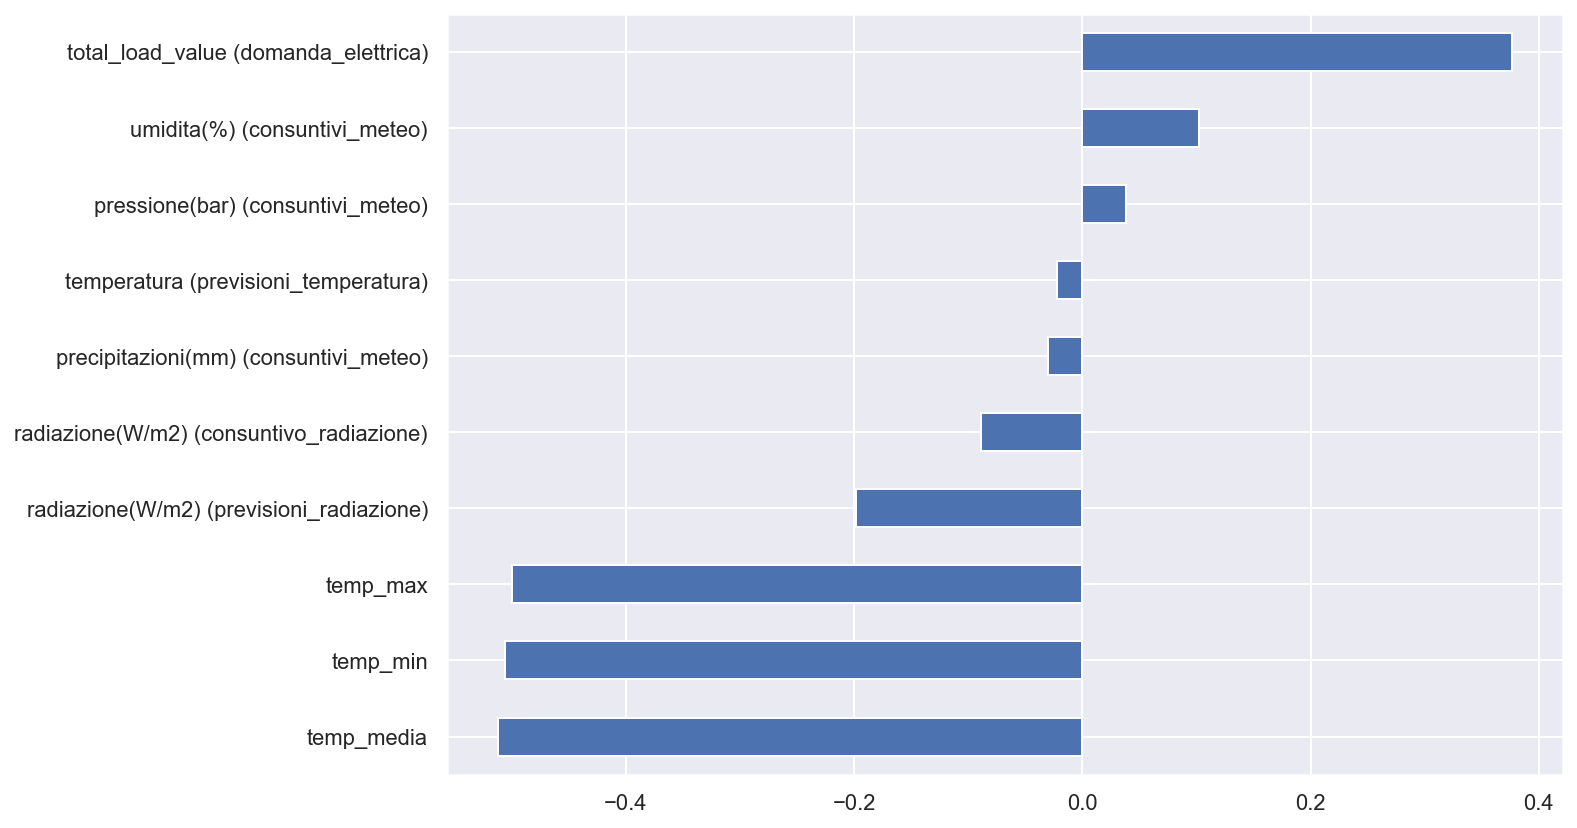

In [29]:
df.corr()["ET_rete (potenza_termica_oraria)"].sort_values()[:-1].plot(kind='barh')

In [30]:
df.corr()["ET_rete (potenza_termica_oraria)"].sort_values()[:-1]

temp_media                                 -0.512249
temp_min                                   -0.505543
temp_max                                   -0.499573
radiazione(W/m2) (previsioni_radiazione)   -0.198516
radiazione(W/m2) (consuntivo_radiazione)   -0.088549
precipitazioni(mm) (consuntivi_meteo)      -0.029830
temperatura (previsioni_temperatura)       -0.022431
pressione(bar) (consuntivi_meteo)           0.038321
umidita(%) (consuntivi_meteo)               0.102554
total_load_value (domanda_elettrica)        0.376572
Name: ET_rete (potenza_termica_oraria), dtype: float64

<AxesSubplot:>

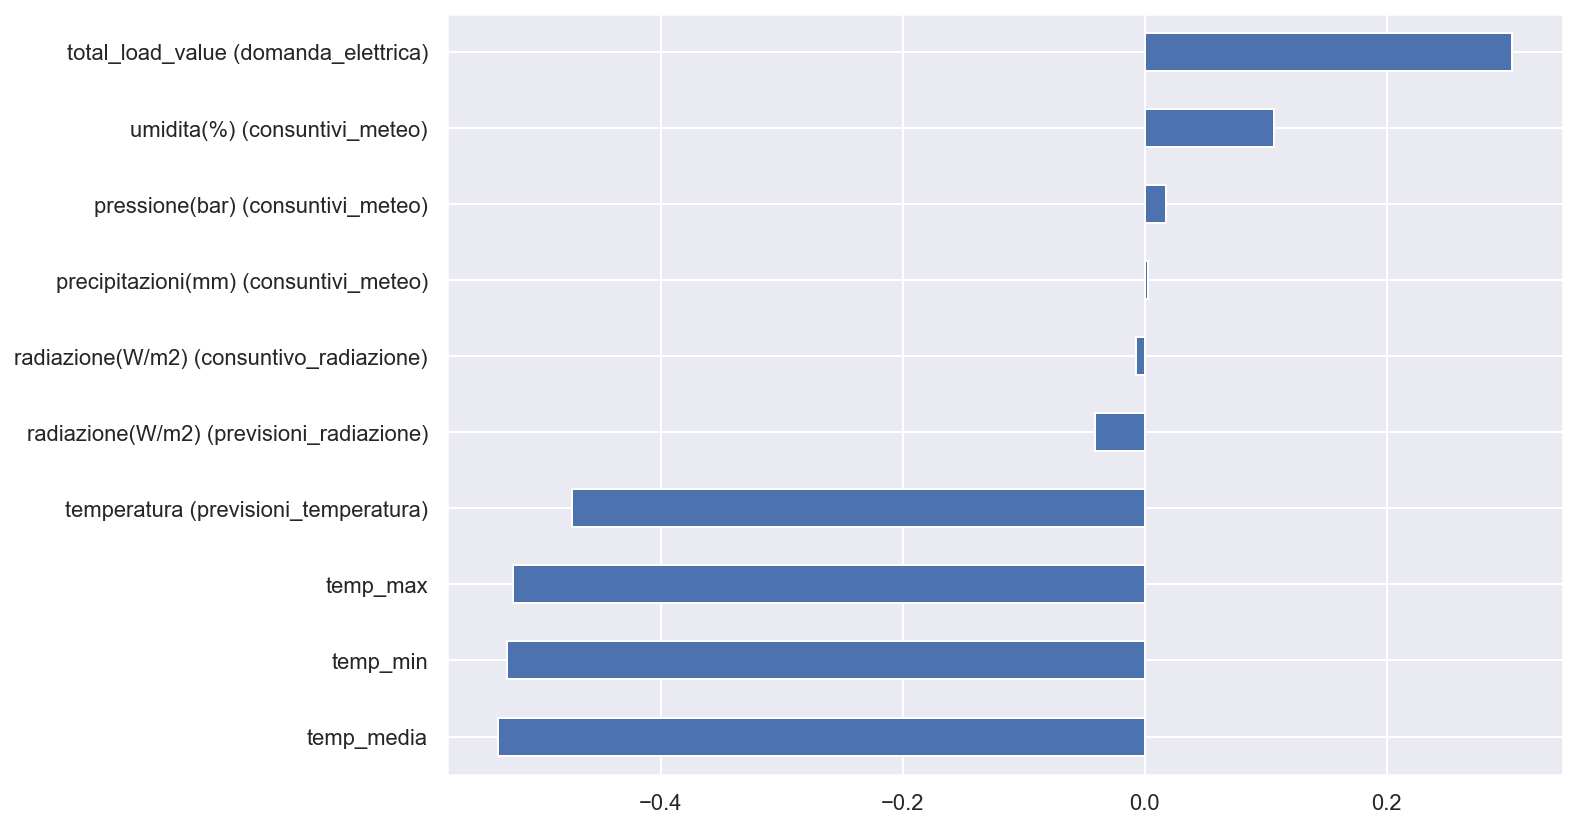

In [31]:
df.corr(method="spearman")["ET_rete (potenza_termica_oraria)"].sort_values()[:-1].plot(kind='barh')

In [34]:
df.corr(method="spearman")["ET_rete (potenza_termica_oraria)"].sort_values()

temp_media                                 -0.534926
temp_min                                   -0.527326
temp_max                                   -0.522601
temperatura (previsioni_temperatura)       -0.473747
radiazione(W/m2) (previsioni_radiazione)   -0.040939
radiazione(W/m2) (consuntivo_radiazione)   -0.007287
precipitazioni(mm) (consuntivi_meteo)       0.002940
pressione(bar) (consuntivi_meteo)           0.017482
umidita(%) (consuntivi_meteo)               0.106381
total_load_value (domanda_elettrica)        0.303616
ET_rete (potenza_termica_oraria)            1.000000
Name: ET_rete (potenza_termica_oraria), dtype: float64

In [42]:
df.isna().sum()

temp_min                                     4559
temp_max                                     4559
temp_media                                   4559
radiazione(W/m2) (consuntivo_radiazione)     8714
total_load_value (domanda_elettrica)        17496
ET_rete (potenza_termica_oraria)             8736
temperatura (previsioni_temperatura)        28368
radiazione(W/m2) (previsioni_radiazione)    35064
precipitazioni(mm) (consuntivi_meteo)       47056
pressione(bar) (consuntivi_meteo)           47056
umidita(%) (consuntivi_meteo)               47056
dtype: int64

<AxesSubplot:xlabel='Orario'>

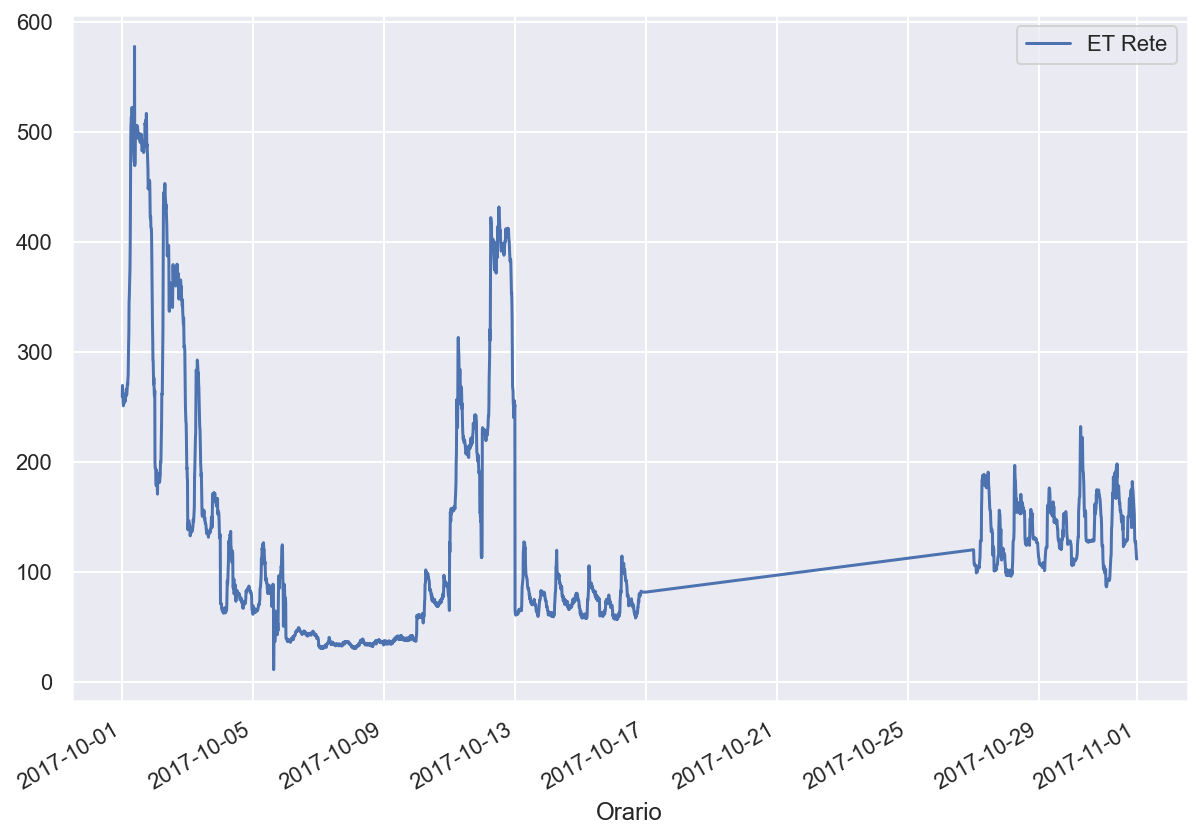

In [52]:
df_raw["PotenzaTermicaOraria"].loc["2017-10"].plot()

In [66]:
df_test = df_raw["PotenzaTermicaOraria"].loc["2017-10-16":"2017-10-29"]

In [67]:
df_test

,ET Rete
Orario,
2017-10-16 00:00:00,60.1
2017-10-16 00:10:00,58.2
2017-10-16 00:20:00,59.0
2017-10-16 00:30:00,60.9
2017-10-16 00:40:00,58.5
...,...
2017-10-29 23:10:00,126.1
2017-10-29 23:20:00,126.1
2017-10-29 23:30:00,126.0


In [68]:
df_test.isna().sum()

ET Rete    0
dtype: int64

In [76]:
df_sum = df_test.resample("H").sum()

In [78]:
df_mean = df_test.resample("H").mean()

In [80]:
df_mean

,ET Rete
Orario,
2017-10-16 00:00:00,59.000000
2017-10-16 01:00:00,58.633333
2017-10-16 02:00:00,58.133333
2017-10-16 03:00:00,58.883333
2017-10-16 04:00:00,62.283333
...,...
2017-10-29 19:00:00,153.166667
2017-10-29 20:00:00,141.366667
2017-10-29 21:00:00,126.833333


In [86]:
df_mean[df_mean.isna().any(axis=1)]

,ET Rete
Orario,
2017-10-17 01:00:00,NaN
2017-10-17 02:00:00,NaN
2017-10-17 03:00:00,NaN
2017-10-17 04:00:00,NaN
2017-10-17 05:00:00,NaN
...,...
2017-10-26 19:00:00,NaN
2017-10-26 20:00:00,NaN
2017-10-26 21:00:00,NaN


In [88]:
df_sum.loc["2017-10-26":]

,ET Rete
Orario,
2017-10-26 00:00:00,0.0
2017-10-26 01:00:00,0.0
2017-10-26 02:00:00,0.0
2017-10-26 03:00:00,0.0
2017-10-26 04:00:00,0.0
...,...
2017-10-29 19:00:00,919.0
2017-10-29 20:00:00,848.2
2017-10-29 21:00:00,761.0
